<a href="https://colab.research.google.com/github/weagan/Convolutional-Neural-Networks/blob/main/Simple_MNIST_Digit_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/TheIndependentCode/Neural-Network

Cloning into 'Neural-Network'...
remote: Enumerating objects: 50, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 50 (delta 17), reused 14 (delta 14), pack-reused 21 (from 1)
Receiving objects: 100% (50/50), 9.82 KiB | 3.27 MiB/s, done.
Resolving deltas: 100% (23/23), done.


In [2]:
with open('/content/Neural-Network/mnist.py', 'r') as f:
    mnist_content = f.read()
print(mnist_content)

import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils

from dense import Dense
from activations import Tanh
from losses import mse, mse_prime
from network import train, predict


def preprocess_data(x, y, limit):
    # reshape and normalize input data
    x = x.reshape(x.shape[0], 28 * 28, 1)
    x = x.astype("float32") / 255
    # encode output which is a number in range [0,9] into a vector of size 10
    # e.g. number 3 will become [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
    y = np_utils.to_categorical(y)
    y = y.reshape(y.shape[0], 10, 1)
    return x[:limit], y[:limit]


# load MNIST from server
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, y_train = preprocess_data(x_train, y_train, 1000)
x_test, y_test = preprocess_data(x_test, y_test, 20)

# neural network
network = [
    Dense(28 * 28, 40),
    Tanh(),
    Dense(40, 10),
    Tanh()
]

# train
train(network, mse, mse_prime, x_train, y_train, epochs=100, learning_rate=0.1)

# test
for x

### `mnist.py` converted to notebook cells

Below are the contents of `mnist.py` broken down into logical code cells.

In [3]:
import numpy as np
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import sys
sys.path.append('/content/Neural-Network/')

from dense import Dense
from activations import Tanh
from losses import mse, mse_prime
from network import train, predict

In [4]:
def preprocess_data(x, y, limit):
    # reshape and normalize input data
    x = x.reshape(x.shape[0], 28 * 28, 1)
    x = x.astype("float32") / 255
    # encode output which is a number in range [0,9] into a vector of size 10
    # e.g. number 3 will become [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
    y = to_categorical(y)
    y = y.reshape(y.shape[0], 10, 1)
    return x[:limit], y[:limit]

In [5]:
# load MNIST from server
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, y_train = preprocess_data(x_train, y_train, 1000)
x_test, y_test = preprocess_data(x_test, y_test, 20)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
print('First training image (x_train[0]):')
print(x_train[0])
print('\nFirst training label (y_train[0]):')
print(y_train[0])

First training image (x_train[0]):
[[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]

In [7]:
def display_image_as_blocks(image_data):
    # Reshape the 784-element array back to 28x28
    image_2d = image_data.reshape(28, 28)

    print("\nBlock Graphic of First Training Image:")
    for row in image_2d:
        for pixel in row:
            # Map pixel intensity to characters for a block graphic
            if pixel < 0.2:
                print('  ', end='') # empty space
            elif pixel < 0.4:
                print(' .', end='') # light gray
            elif pixel < 0.6:
                print(' -', end='') # medium gray
            elif pixel < 0.8:
                print(' +', end='') # darker gray
            else:
                print(' #', end='') # black
        print() # New line after each row

display_image_as_blocks(x_train[0])


Block Graphic of First Training Image:
                                                        
                                                        
                                                        
                                                        
                                                        
                                 - - +   + # # -        
                     . + + # # # # # # + # # + .        
                 # # # # # # # # # # . . . .            
                 # # # # # # + + # #                    
                 . + - # # #       +                    
                       + # .                            
                       - # +                            
                         + # .                          
                           # # + -                      
                           . # # # -                    
                               + # # -                  
                                 . # # +        

In [8]:
# neural network
network = [
    Dense(28 * 28, 40),
    Tanh(),
    Dense(40, 10),
    Tanh()
]

In [9]:
# train
train(network, mse, mse_prime, x_train, y_train, epochs=100, learning_rate=0.1)

1/100, error=0.9024770099808573
2/100, error=0.8262126475986363
3/100, error=0.7850334023108451
4/100, error=0.7391199405179384
5/100, error=0.6906683098607453
6/100, error=0.6255189888280787
7/100, error=0.5314980494312231
8/100, error=0.3863777159875171
9/100, error=0.2621246788599441
10/100, error=0.19274811326990185
11/100, error=0.16304463474031775
12/100, error=0.14239054611186322
13/100, error=0.1278825933879086
14/100, error=0.1211418487852767
15/100, error=0.11677072935063414
16/100, error=0.11359899795308467
17/100, error=0.11092315295603612
18/100, error=0.10836110910413849
19/100, error=0.10610502283485176
20/100, error=0.10423113880719938
21/100, error=0.10282540994724966
22/100, error=0.10140188168205277
23/100, error=0.09974575423425276
24/100, error=0.09781691363572977
25/100, error=0.09600906348316172
26/100, error=0.09448801555184114
27/100, error=0.09336445968270746
28/100, error=0.09235204144647048
29/100, error=0.09134826220314723
30/100, error=0.0904132160742479
3

In [10]:
# test
for x, y in zip(x_test, y_test):
    output = predict(network, x)
    print('pred:', np.argmax(output), '\ttrue:', np.argmax(y))

pred: 7 	true: 7
pred: 1 	true: 2
pred: 1 	true: 1
pred: 0 	true: 0
pred: 4 	true: 4
pred: 1 	true: 1
pred: 9 	true: 4
pred: 3 	true: 9
pred: 4 	true: 5
pred: 7 	true: 9
pred: 0 	true: 0
pred: 3 	true: 6
pred: 9 	true: 9
pred: 0 	true: 0
pred: 1 	true: 1
pred: 9 	true: 5
pred: 9 	true: 9
pred: 7 	true: 7
pred: 3 	true: 3
pred: 9 	true: 4


In [11]:
correct_predictions = 0
total_test_samples = len(x_test)

for x, y in zip(x_test, y_test):
    output = predict(network, x)
    predicted_digit = np.argmax(output)
    true_digit = np.argmax(y)

    if predicted_digit == true_digit:
        correct_predictions += 1

accuracy = correct_predictions / total_test_samples
print(f'Overall accuracy on the test set: {accuracy * 100:.2f}%')

Overall accuracy on the test set: 60.00%


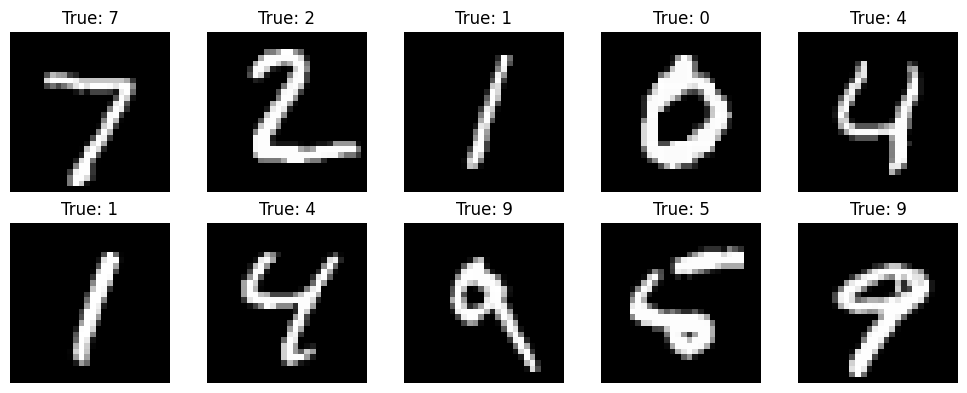

In [12]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {np.argmax(y_test[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()